In [1]:
from warnings import simplefilter
simplefilter("ignore", category=FutureWarning) 
simplefilter("ignore", category=UserWarning)
import sys
if '/home/rossco/immunova' not in sys.path:
    sys.path.append('/home/rossco/immunova')
from immunova.data.mongo_setup import pd_init
from immunova.data.fcs_experiments import FCSExperiment
from immunova.flow.gating.actions import Gating, Template
from immunova.flow.gating.defaults import ChildPopulationCollection
from tqdm import tqdm_notebook
import matplotlib
import pandas as pd
import os
pd_init()

In [2]:
texp = FCSExperiment.objects(experiment_id='PD_T_PBMCs').get()

In [3]:
t = Template(texp, '175-09_pbmc_t', include_controls=False)

In [4]:
t.load_template('PBMCt_Preprocessing')

True

Applying boundary...
------ boundary ------
New population: cells
...proportion of total events: 0.873
...proportion of parent: 0.873
New population: debris
...proportion of total events: 0.127
...proportion of parent: 0.127
-----------------------
Applying CD3_gate...
------ CD3_gate ------
New population: CD3+
...proportion of total events: 0.092
...proportion of parent: 0.105
New population: CD3-
...proportion of total events: 0.781
...proportion of parent: 0.895
-----------------------
Applying live_gate...
------ live_gate ------
New population: dead
...proportion of total events: 0.005
...proportion of parent: 0.050
New population: live
...proportion of total events: 0.087
...proportion of parent: 0.950
-----------------------
Applying singlets1_gate...
------ singlets1_gate ------
New population: singlets1
...proportion of total events: 0.077
...proportion of parent: 0.889
New population: doublets1
...proportion of total events: 0.010
...proportion of parent: 0.111
-------------

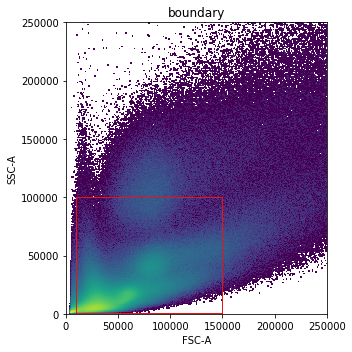

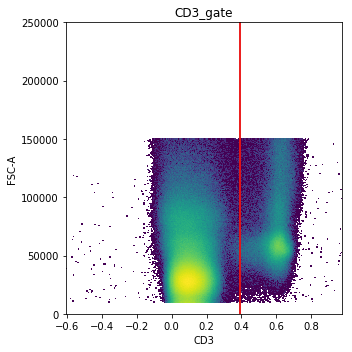

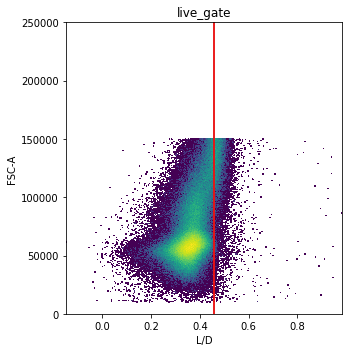

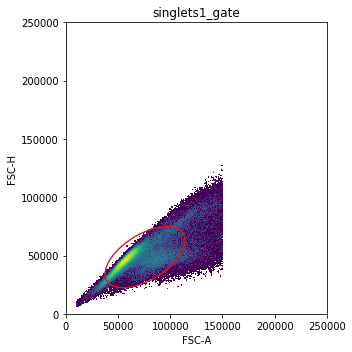

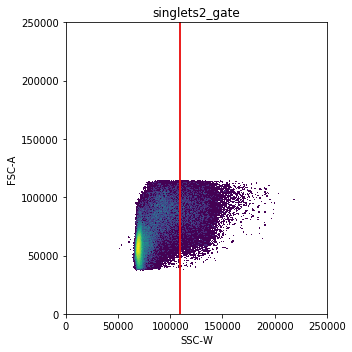

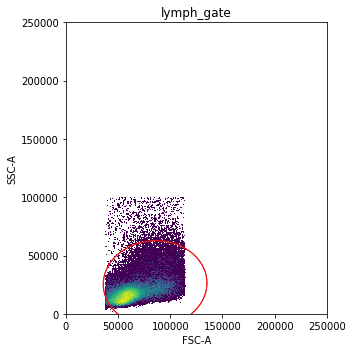

In [5]:
t.apply_many(apply_all=True, plot_outcome=True)

In [9]:
t.populations['single_Live_CD3+'].geom

{'method': 'Quantile',
 'threshold': 109408.1640625,
 'shape': 'threshold',
 'x': 'SSC-W',
 'y': None}

In [10]:
new_geom = t.populations['single_Live_CD3+'].geom
new_geom['threshold'] = 90000
new_geom = {'single_Live_CD3+': new_geom, 'doublets2': new_geom}

In [11]:
t.edit_gate('singlets2_gate', updated_geom=new_geom)

Editing gate: singlets2_gate
Updating doublets2
Updating single_Live_CD3+
The following gates are downstream of singlets2_gate and will need to be applied again: ['lymph_gate']
Edit complete!


------ lymph_gate ------
New population: Lymphocytes
...proportion of total events: 0.009
...proportion of parent: 0.934
New population: other cells
...proportion of total events: 0.001
...proportion of parent: 0.066
-----------------------


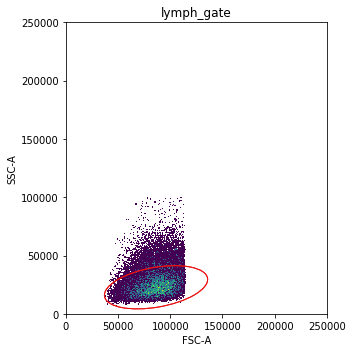

In [12]:
t.apply('lymph_gate')

In [13]:
t.save(overwrite=True)

Saved successfully!


True